In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
sns.set_style('darkgrid')

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('PdM_merged.csv', index_col=0)
df

,dayofyear,machineID,volt_min,volt_max,volt_mean,volt_std,rotate_min,rotate_max,rotate_mean,rotate_std,...,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4,failure
0,1.0,1.0,151.335682,182.739113,167.576533,9.300337,346.149335,527.349825,440.515328,49.590263,...,0.0,0.0,0.0,0.0,18,0,0,1,0,0.0
1,2.0,1.0,140.776309,200.872430,169.795758,15.742155,384.645962,519.452812,446.832666,38.800266,...,0.0,0.0,0.0,0.0,18,0,0,1,0,0.0
2,3.0,1.0,154.199258,194.942847,171.862244,11.182853,374.127148,568.972310,459.204742,47.387959,...,0.0,0.0,0.0,0.0,18,0,0,1,0,0.0
3,4.0,1.0,129.016707,215.656488,174.792428,19.224657,365.213804,517.348533,448.743201,34.008026,...,0.0,0.0,0.0,0.0,18,0,0,1,0,1.0
4,5.0,1.0,127.163620,202.520488,171.018408,17.900560,376.719605,575.505189,454.822750,47.803621,...,1.0,0.0,0.0,1.0,18,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36538,361.0,100.0,145.909881,203.763130,170.382439,13.130502,365.490396,535.030852,445.068708,52.431563,...,0.0,0.0,0.0,0.0,5,0,0,0,1,0.0
36539,362.0,100.0,130.047860,191.718640,170.982029,15.030665,295.007058,534.308376,454.875385,58.013495,...,0.0,0.0,0.0,0.0,5,0,0,0,1,0.0
36540,363.0,100.0,138.907176,201.575942,167.114444,16.654803,330.022513,575.699721,459.097599,56.447064,...,0.0,0.0,0.0,0.0,5,0,0,0,1,0.0
36541,364.0,100.0,147.594046,190.693971,168.613777,12.261241,372.584704,570.088736,455.140822,59.849202,...,0.0,0.0,0.0,0.0,5,0,0,0,1,0.0


<Axes: >

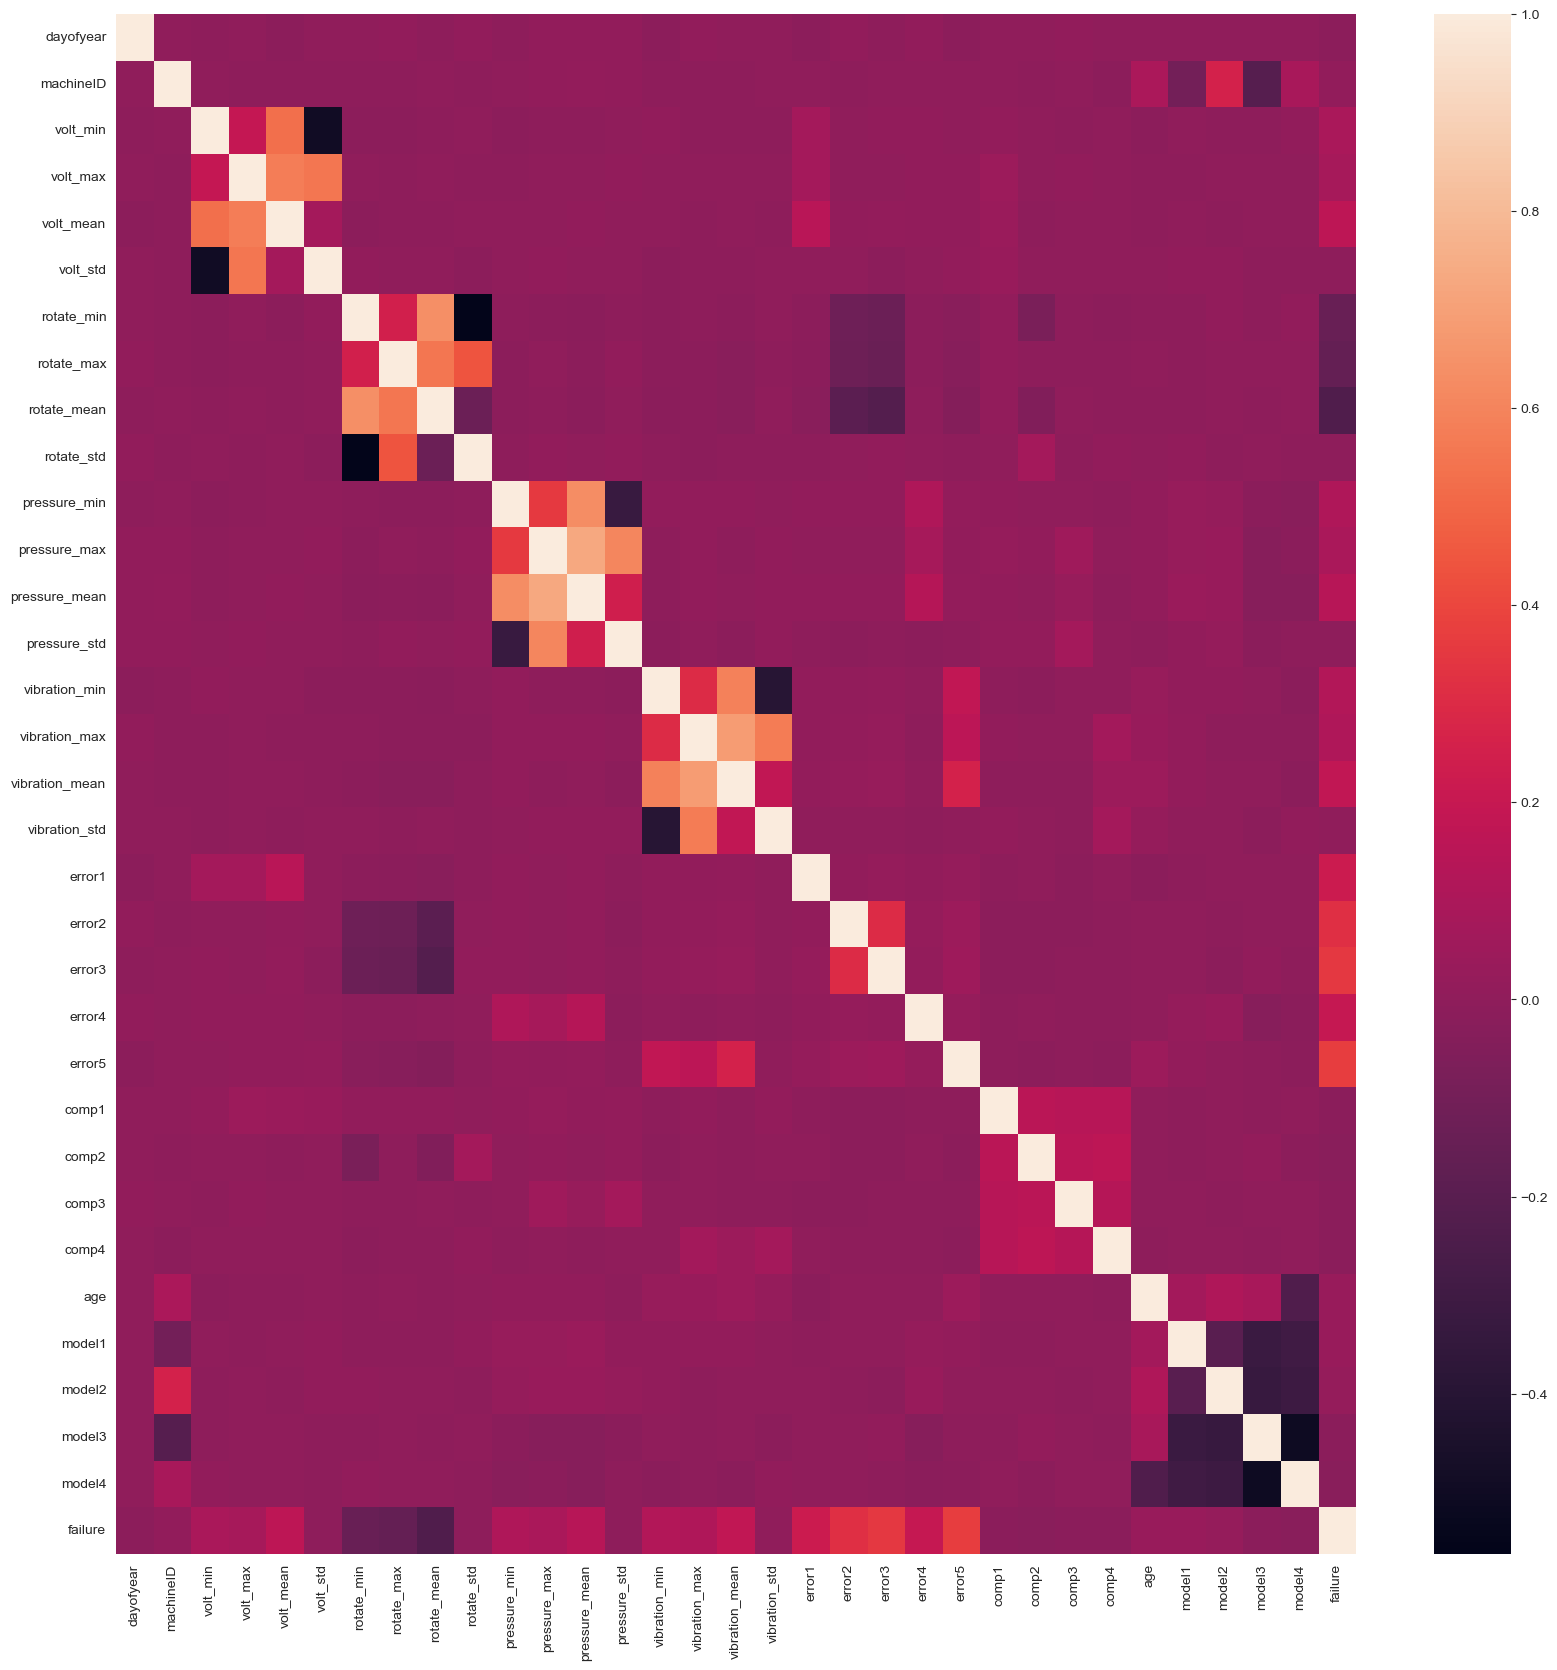

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

## Quickly checking feature-label correlations
Errors of type 2, 3, and 5 have the largest correlation coefficient with having a failure the next day.

<Axes: ylabel='failure'>

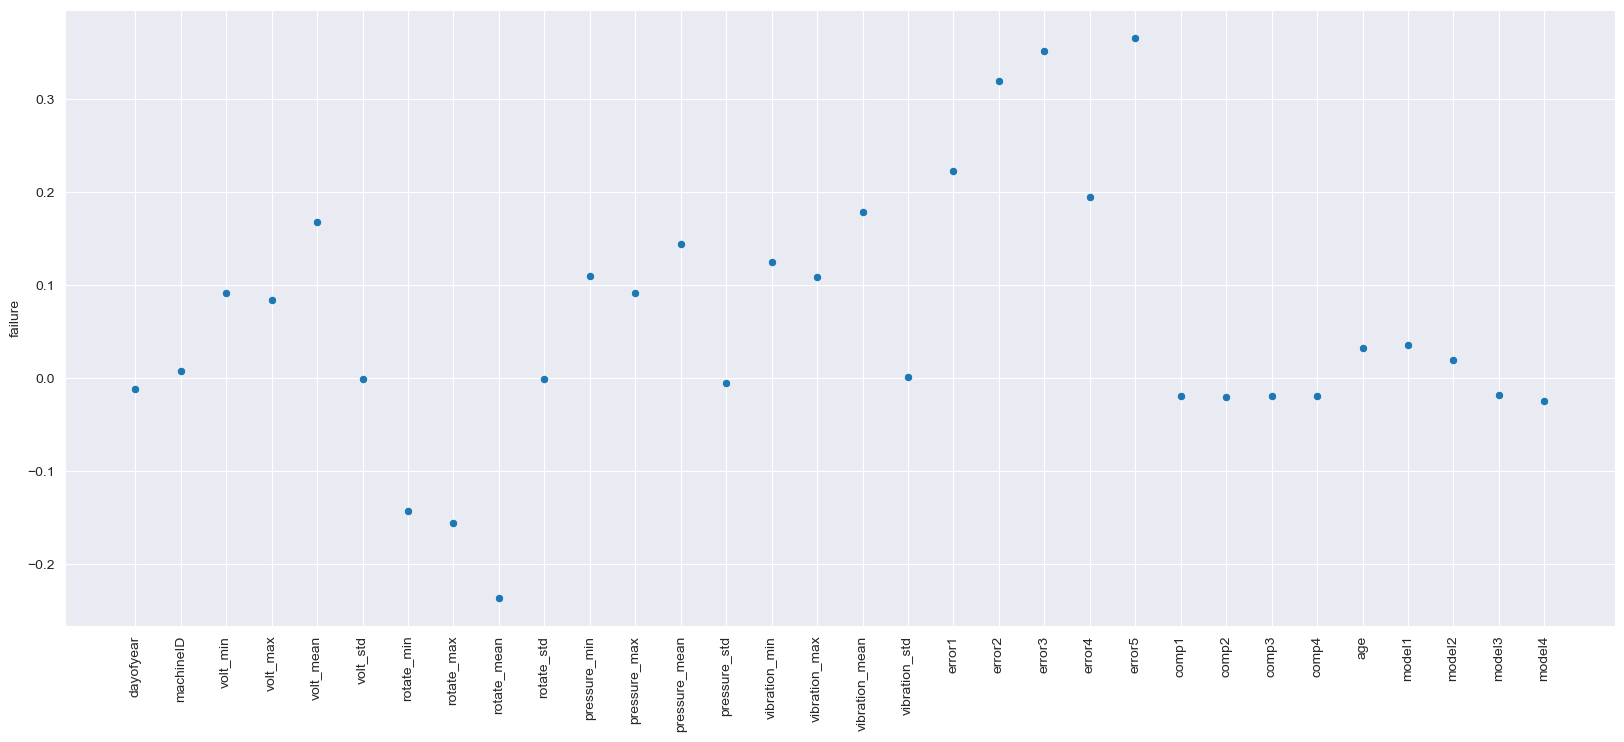

In [4]:
X, y = df.drop(['machineID', 'failure'], axis=1), df['failure']

plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.scatterplot(df.corr()['failure'][:-1])

## Decision Tree
We'll start with a decision tree since it is a simple model, easily explainable, and amenable to binary classification. We'll quantify performance using the recall score. 

Recall measures the fraction of true positives to all positives. When engaging in predictive maintenance of machines, it's safer to err on the side of caution and send someone to fix a machine if we think it will fail. There may be costs associated with sending a technician more frequently, and the client will have to make the decision as to whether this is a sound business decision. 

e.g. If it's cheaper to leave a failed machine off for a week than to send a technician more frequently, recall may no longer be the best metric. 

Here I'm assuming this is not the case. A followup meeting with a client could clarify this. Hyperparameters may need to be retuned or a different model may be selected if this happens. 

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

recall_score(y_test, preds), confusion_matrix(y_test, preds)

(0.933649289099526,
 array([[8911,   14],
        [  14,  197]]))

A recall of 92% means that most of the failures were correctly identified. Of the 211 failures, 197 were correctly identified while 14 were misidentified. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


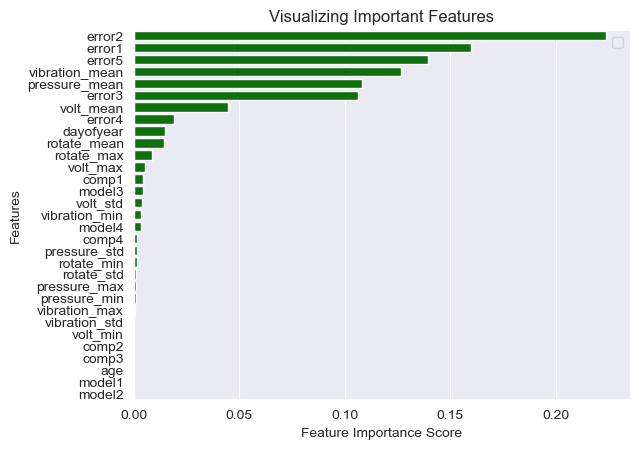

In [6]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# feature_imp
sns.barplot(x = feature_imp, y = feature_imp.index, color='green')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()
plt.show()

[Text(0.7404336734693877, 0.9666666666666667, 'error5 <= 0.5\ngini = 0.039\nsamples = 27407\nvalue = [26857, 550]'),
 Text(0.5829081632653061, 0.9, 'error3 <= 0.5\ngini = 0.029\nsamples = 27127\nvalue = [26727, 400]'),
 Text(0.4107142857142857, 0.8333333333333334, 'volt_mean <= 187.066\ngini = 0.015\nsamples = 26517\nvalue = [26311, 206]'),
 Text(0.27040816326530615, 0.7666666666666667, 'error4 <= 0.5\ngini = 0.007\nsamples = 25941\nvalue = [25852, 89]'),
 Text(0.15306122448979592, 0.7, 'volt_mean <= 183.356\ngini = 0.001\nsamples = 25449\nvalue = [25430, 19]'),
 Text(0.10204081632653061, 0.6333333333333333, 'vibration_min <= 47.547\ngini = 0.0\nsamples = 25187\nvalue = [25184, 3]'),
 Text(0.061224489795918366, 0.5666666666666667, 'dayofyear <= 1.5\ngini = 0.0\nsamples = 25183\nvalue = [25181, 2]'),
 Text(0.04081632653061224, 0.5, 'rotate_max <= 475.08\ngini = 0.061\nsamples = 64\nvalue = [62, 2]'),
 Text(0.02040816326530612, 0.43333333333333335, 'gini = 0.0\nsamples = 1\nvalue = [0, 1

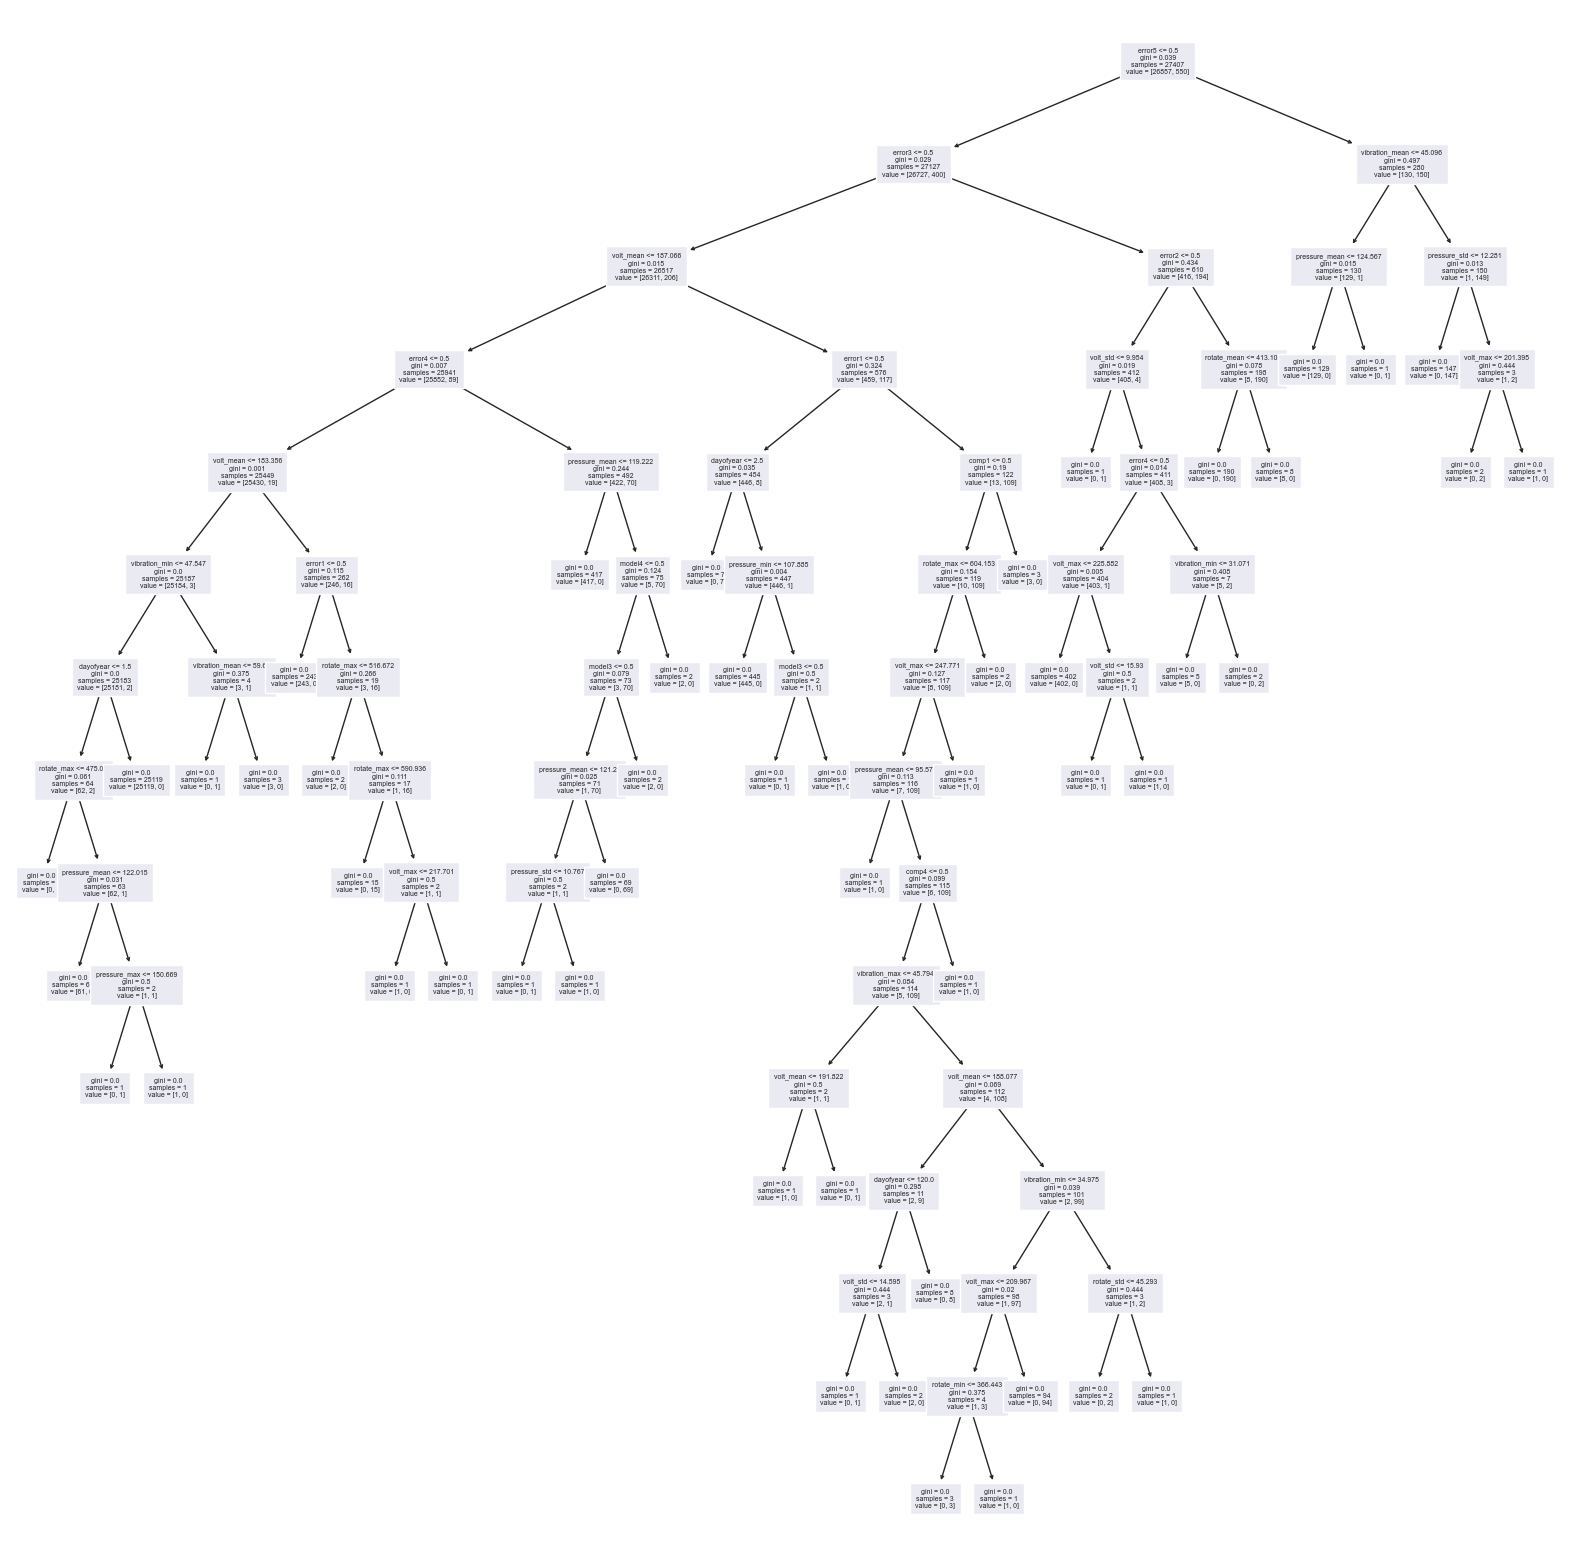

In [7]:
from sklearn.tree import plot_tree 

plt.figure(figsize=(20,20))
plot_tree(model, fontsize=5, feature_names=list(X.columns.values))

### 5-fold cross validation recall score

In [8]:
from sklearn.model_selection import cross_val_score 

cross_val_score(model, X, y, scoring='recall').mean()

0.9447884416924666

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(max_iter=10000)

lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
recall_score(y_test, lr_preds)

/Users/samihakani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7440758293838863

In [10]:
cross_val_score(lr, X, y, scoring='recall').mean()

/Users/samihakani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/samihakani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.745063639490884

Logistic regression will need to be tuned in order to compete with the decision tree model. It is also less interpretable, so it may not be worthwhile to continue exploring this option.

## Gradient Boosting

XGBoost may find nonlinear relationships between numerical features and our label that decision trees could not find. 

In [11]:
from xgboost import XGBClassifier 

xgb = XGBClassifier()

xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
recall_score(y_test, xgb_preds)

0.966824644549763

In [12]:
cross_val_score(xgb, X, y, scoring='recall').mean()

0.9697626418988647

XGBoost has a comparable recall score to the decision tree model. What happens if we tune hyperparameters?

### Grid searching hyperparameters using `GridSearchCV`

Coarse tuning of `n_estimators` from 1 to 500, `max_depth` from 1 to 10, and `learning_rate` from 0.001 to 0.5 yielded the default parameters (100, 3, .1). 

In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [3],
    'learning_rate' : [1e-2, 2e-2, 5e-2, 1e-1, 2e-2, 5e-1],
}

search = GridSearchCV(xgb, params, cv = 3, scoring='recall')
search.fit(X, y)
print(f"Best parameter (CV score = {search.best_score_}):")
print(search.best_params_)

Best parameter (CV score = 0.9737221582480057):
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [14]:
search.cv_results_

{'mean_fit_time': array([1.64068238, 1.6102736 , 1.60667928, 1.62034464, 1.60346135,
        1.51784571]),
 'std_fit_time': array([0.03149653, 0.01552664, 0.02202209, 0.01017093, 0.00883727,
        0.02607627]),
 'mean_score_time': array([0.0280304 , 0.02804271, 0.02784594, 0.02802444, 0.0281353 ,
        0.028289  ]),
 'std_score_time': array([0.00227305, 0.00296189, 0.00171609, 0.00030588, 0.00139462,
        0.00087941]),
 'param_learning_rate': masked_array(data=[0.01, 0.02, 0.05, 0.1, 0.02, 0.5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 3, 3, 3, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 100, 100, 100, 100, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'le

### Although XGBoost may slightly outperform the decision tree model, it is not easily interpretable. 

It could potentially injest telemetry data (gradient boosted trees are amenable to on-line learning). One could develop a tool that monitors telemetry data and pings a dispatcher to send a technician to machines that are predicted to fail the next day. 

## Conclusions

Decision trees balance a good recall score (> 90%) with interpretability, so this is the best model to inform us on proactive maintenance. 

We gained further insight into the types of errors (Types 1, 2, and 5) that are most strongly correlated with machine failure. Numerical features such as `vibration_mean`, `pressure_mean`, and `voltage_mean` were also determined to be important in determining machine failure. It may be worthwhile to reduce variability in these metrics between machines to further reduce machine failure. 

Proactive maintenance can be carried out using the results of the decision tree analysis. 
1. Errors of type 1, 2, and 5 are correlated with (but not necessarily indicitive of) machine failure within 24 hours. Technicians should be dispatched to check machines if these errors are presented. Since maintenence was not strongly correlated with machine failure, proactive maintenance will likely not increase machine failure rate. 

2. Telemetry data indicating abnormal sensor values for vibration, pressure, and voltage should further indicate proactive maintenance is required. 

Examples of abnormal sensor values (decision tree top level paths)
* On a given day, if we see Error 5, a mean vibration > 45, and pressure standard deviation < 12.25
* Error 3 and Error 2 on the same day
* Error1 and a mean voltage > 157

Surprisingly machine age does not seem to be an important feature in predicting failures at this point in time. This suggests machines up to age 20 can be reasonably kept in service. 
